In [143]:
import sys, os
# necessary to find ros packages
sys.path.append('/opt/ros/humble/local/lib/python3.10/dist-packages')

import numpy as np
import matplotlib.pyplot as plt

from scipy import ndimage
from models.map import Map
from models.point import Point
import yaml
import math

Load local Costmap

[[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


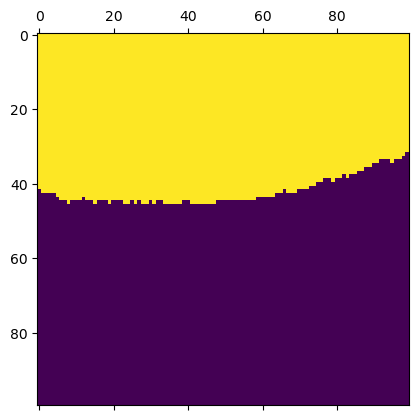

In [155]:
base_path ="../../out/"
with open(os.path.join(base_path, "costmap/map.npy"),'rb') as f:
        local_costmap = np.load(f)

with (open(os.path.join(base_path, "costmap/map.yaml"), 'rb')) as f:
    local_costmap_config = yaml.safe_load(f)

print(local_costmap)
local_costmap = (local_costmap > 90) * 1 # one for track, zero for forbidden
plt.matshow(local_costmap)

# base_path ="../../out/"
# with open(os.path.join(base_path, "costmap/map_1.npy"),'rb') as f:
#         local_costmap = np.load(f)

# with (open(os.path.join(base_path, "costmap/map_1.yaml"), 'rb')) as f:
#     local_costmap_config = yaml.safe_load(f)

# print(local_costmap)
# local_costmap = (local_costmap > 95) * 1 # one for track, zero for forbidden
# local_costmap = np.rot90(np.rot90(local_costmap))
# plt.matshow(local_costmap)



resolution = local_costmap_config["resolution"]
local_costmap_map = Map(local_costmap, resolution, Point(local_costmap_config["origin_x"] - resolution, local_costmap_config["origin_y"] -resolution))


Load global costmap

In [156]:
base_path ="../../out/tracks/track_4/"
with open(os.path.join(base_path, "costmap/map.npy"),'rb') as f:
        occupancy_grid = np.load(f)

with (open(os.path.join(base_path, "costmap/map.yaml"), 'rb')) as f:
    occupancy_grid_config = yaml.safe_load(f)

occupancy_grid = (occupancy_grid != 0) * 1
resolution = occupancy_grid_config["resolution"]
occupancy_map = Map(occupancy_grid, resolution, Point(occupancy_grid_config["origin_x"] - resolution, occupancy_grid_config["origin_y"] -resolution))

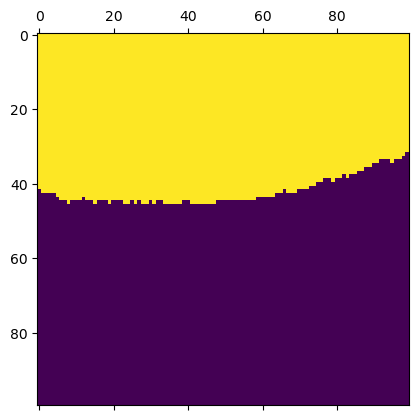

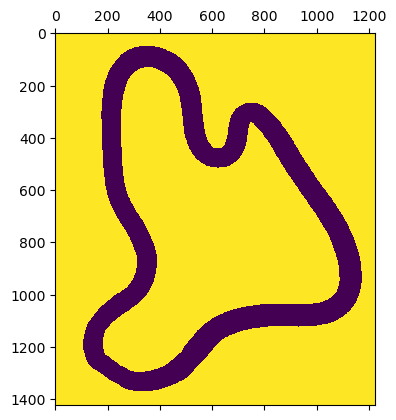

In [157]:
plt.matshow(local_costmap)
plt.matshow(occupancy_grid)

Shift local costmap such that origins align

In [158]:
delta_origin_x = (local_costmap_map.origin_wf.x-occupancy_map.origin_wf.x)
delta_origin_y = (local_costmap_map.origin_wf.y- occupancy_map.origin_wf.y)
moves_x = round(delta_origin_x / local_costmap_map.resolution)
moves_y = round(delta_origin_y / local_costmap_map.resolution)

print(moves_x)
print(moves_y)

295
1255


In [159]:
print(local_costmap_map.dimension_x)
print(local_costmap_map.dimension_y)

100
100


movesy 1355, moves_x 395


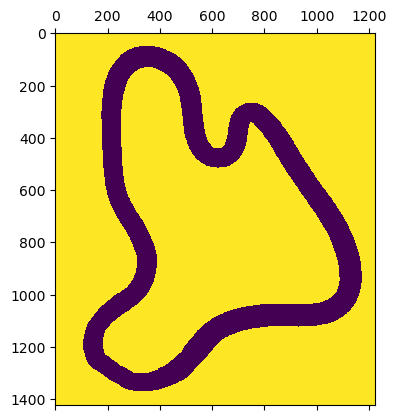

In [160]:
test_world = occupancy_map.grid.copy()
moves_y_end = min(moves_y + local_costmap_map.dimension_y, test_world.shape[0])
moves_x_end = min(moves_x + local_costmap_map.dimension_x, test_world.shape[1])

print(f"movesy {moves_y_end}, moves_x {moves_x_end}")
world_to_copy = local_costmap_map.grid[0:moves_y_end - moves_y, 0:moves_x_end - moves_x]
test_world[moves_y:moves_y_end, moves_x: moves_x_end] = world_to_copy
local_costmap_map.dimension_x
plt.matshow(test_world)

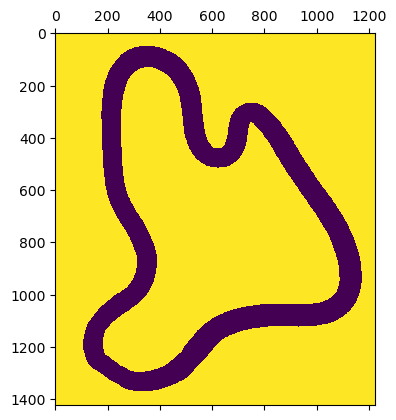

In [161]:
# in cp,ination zeros must be dominant, use and
new_occupancy_grid = occupancy_map.grid * test_world
plt.matshow(new_occupancy_grid)

In [151]:
def rotate_origin_only(xy, radians):
    """Only rotate a point around the origin (0, 0)."""
    x, y = xy
    xx = x * math.cos(radians) + y * math.sin(radians)
    yy = -x * math.sin(radians) + y * math.cos(radians)

    return xx, yy

print(rotate_origin_only((-19.3, -5.6), 4.712))

(5.607506897579136, -19.2978202498003)


In [152]:
np.rot90(np.rot90(local_costmap))

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])